In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 01 - Exploratory Data Analysis (Asthma Dataset)

In this notebook, we:
- Load the asthma dataset
- Check validity (missing values, duplicates, datatypes)
- Explore distributions and relationships
- Create some visualizations for insights


In [3]:
df = pd.read_csv("../data/raw/asthma_disease_data.csv")

In [4]:
print("Shape:", df.shape)
df.head()

Shape: (2392, 29)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
df.info()

df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2392.0,NaN,NaN,NaN,6229.5,690.655244,5034.0,5631.75,6229.5,6827.25,7425.0
Age,2392.0,NaN,NaN,NaN,42.13796,21.606655,5.0,23.0,42.0,61.0,79.0
Gender,2392.0,NaN,NaN,NaN,0.493311,0.50006,0.0,0.0,0.0,1.0,1.0
Ethnicity,2392.0,NaN,NaN,NaN,0.669732,0.98612,0.0,0.0,0.0,1.0,3.0
EducationLevel,2392.0,NaN,NaN,NaN,1.307274,0.898242,0.0,1.0,1.0,2.0,3.0
BMI,2392.0,NaN,NaN,NaN,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,NaN,NaN,NaN,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
PhysicalActivity,2392.0,NaN,NaN,NaN,5.051786,2.903574,0.00174,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,NaN,NaN,NaN,5.022867,2.90998,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,NaN,NaN,NaN,7.019012,1.732475,4.001437,5.4985,6.975839,8.52695,9.996235


In [6]:
print("Missing values per column:\n", df.isna().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values per column:
 PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

Number of duplicate rows: 0


Diagnosis
0    2268
1     124
Name: count, dtype: int64
Diagnosis
0    0.948161
1    0.051839
Name: proportion, dtype: float64


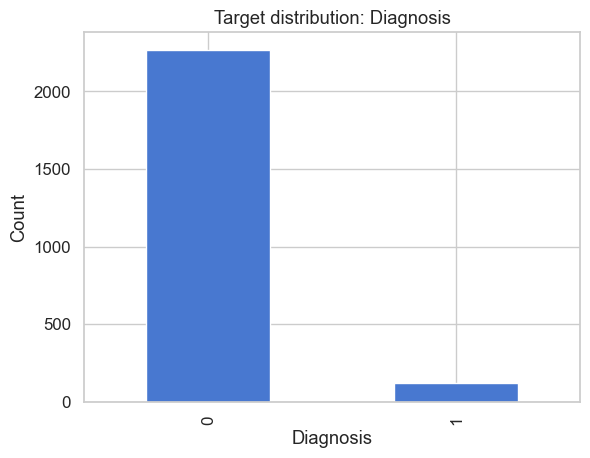

In [7]:
target_col = "Diagnosis"
print(df[target_col].value_counts())
print(df[target_col].value_counts(normalize=True))

df[target_col].value_counts().plot(kind="bar")
plt.title(f"Target distribution: {target_col}")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.show()

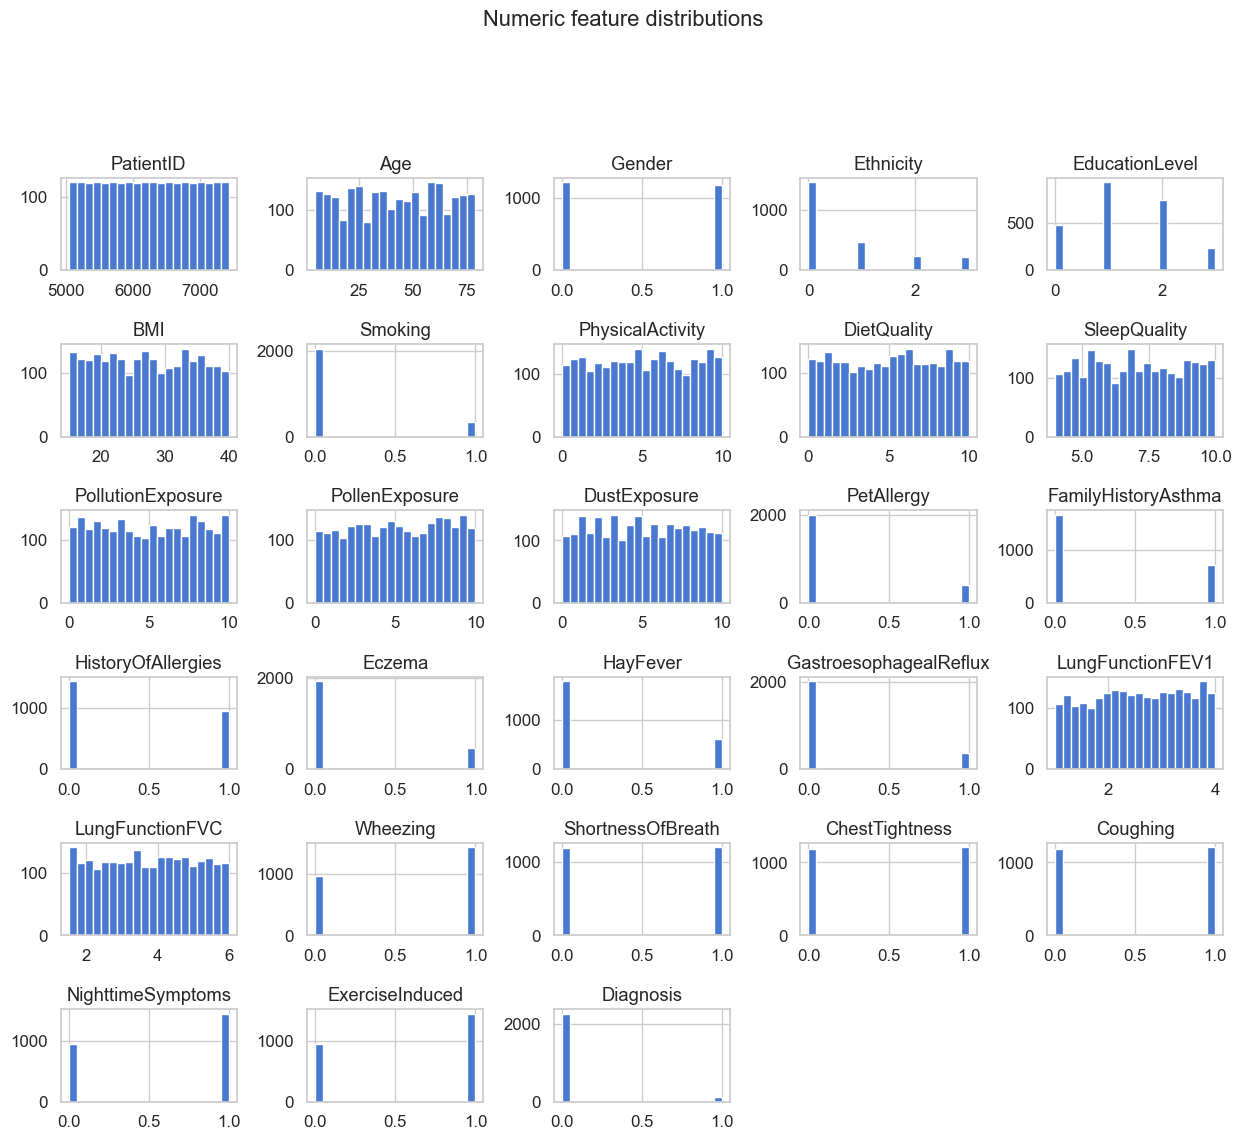

In [8]:
ax = df.hist(
    bins=20, 
    figsize=(15, 12),
    layout=(6, 5),
)

plt.suptitle("Numeric feature distributions", y=1.02)

plt.subplots_adjust(hspace=0.8, wspace=0.4)

plt.show()

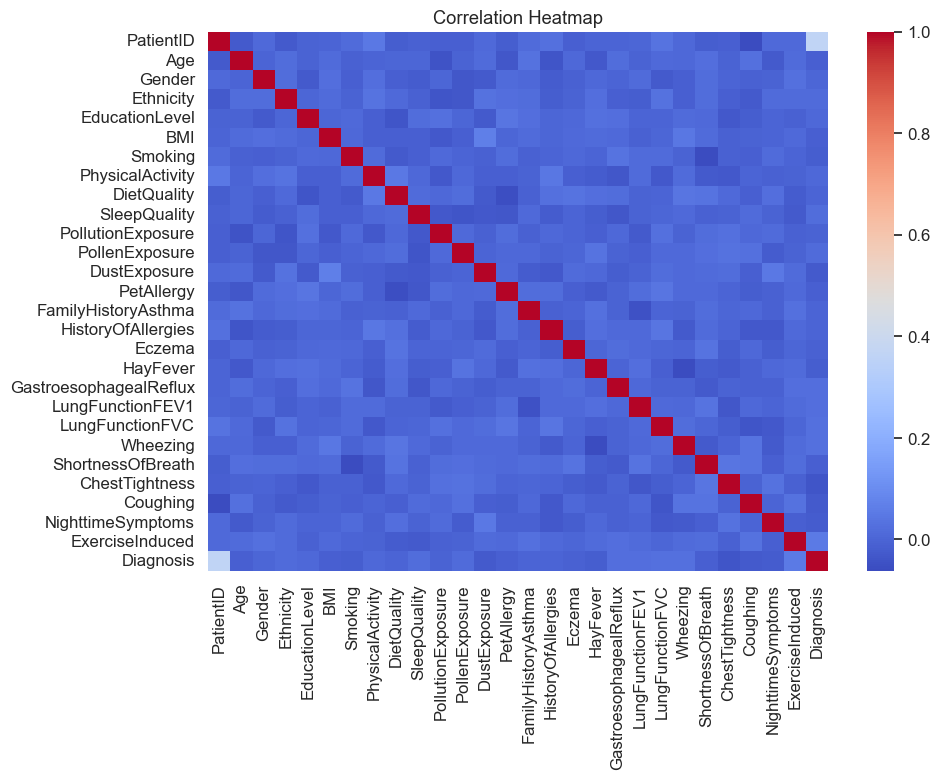

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df.groupby("Diagnosis").mean(numeric_only=True).T.sort_values(1, ascending=False).head(10)

Diagnosis,0,1
PatientID,6170.587302,7307.032258
Age,42.214286,40.741935
BMI,27.265959,26.859284
SleepQuality,7.011713,7.152516
PollenExposure,5.104009,5.300995
PhysicalActivity,5.048347,5.114679
DietQuality,5.025009,4.983685
PollutionExposure,5.016142,4.956103
DustExposure,4.999224,4.664342
LungFunctionFVC,3.732240,3.906432
